In [1]:
import h5py
import pickle 
import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt
filename1=('/project/rpp-chime/chime/chime_processed/holography/holo_stack/CygA/CYG_A_20181017T021625_to_20191016T022121.h5')
f1 = h5py.File(filename1,'r') 
freqs = f1['index_map']["freq"][()]
lst=[]
angle = f1['index_map']["pix"][()]
for i in angle:
    x=i[1]
    lst.append(x)
#print(len(lst))
frequencies=list(range(1024))
feeds=list(range(2048))
print(np.shape(frequencies))
print(np.shape(feeds))

(1024,)
(2048,)


In [2]:
np.shape(f1['beam'][()])

(1024, 2, 2048, 720)

In [3]:
freq600 = f1['index_map']["freq"][107]
print(freq600)

758.203125


In [4]:
FFF=[]
for j in feeds:
    #YES=[]
    freq600 = f1['index_map']["freq"][107]
    #print(freq600)
    yy600=f1['beam'][107,0,j]
    max_y = max(yy600)
    if max_y==0:
        FFF.append(None)
    else:
        max_index=np.where(yy600 == max_y)
        number= max_index[0][0] # This is the index of maximum y value in the list. Peak value of y.
            #print(number)
        xmax = lst[number]
        FFF.append((xmax))

            #print(x1_half)
            #print(x2_half)
            #print(FWHM)
    #FFF.append(YES)
print(np.shape(FFF))
#print(FFF)

(2048,)


Text(0.5, 1.0, '758.203125 MHz')

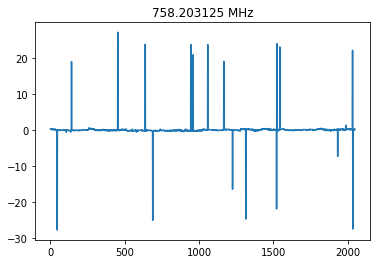

In [5]:
plt.plot(FFF)
plt.title('758.203125 MHz')

In [6]:
xyz=np.array(FFF, dtype=np.float)
ddd=[]
for i in xyz:
    if (np.abs(i)<0.5):
        ddd.append(i)
    else:
        ddd.append(np.nan)
#print(ddd)

/tmp/ipykernel_49839/3451812655.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xyz=np.array(FFF, dtype=np.float)


In [7]:
with open('Beam_offset_CygA_758', 'wb') as f: 
        pickle.dump(ddd, f) 

(2048,)

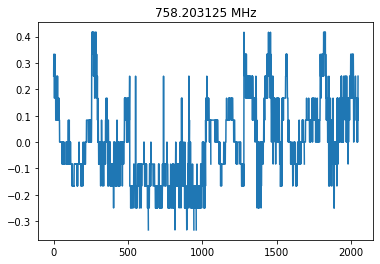

In [8]:
plt.plot((ddd))
plt.title('758.203125 MHz')
np.shape(ddd)

(256,)
(256,)
(256,)
(256,)
-0.010582011281734421
-0.14591568169504288
0.024374177245047726
0.04790026366006671


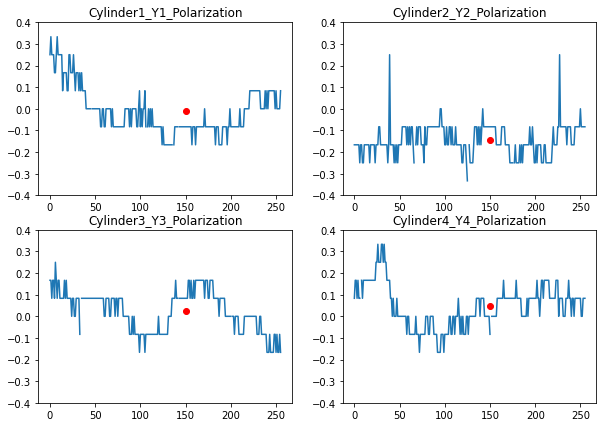

In [9]:
Y1= ddd[0:256]
Y2= ddd[512:768]
Y3= ddd[1024:1280]
Y4= ddd[1536:1792]
print(np.shape(Y1))
print(np.shape(Y2))
print(np.shape(Y3))
print(np.shape(Y4))

fig = plt.figure(figsize=(10, 7))

fig.add_subplot(2,2,1)
plt.title("Cylinder1_Y1_Polarization")
plt.ylim(-0.4, 0.4)
plt.plot(range(256),Y1)
average_beam1=np.nanmean(Y1)
plt.scatter(150,average_beam1,c="red")
print(average_beam1)
#plt.show()


fig.add_subplot(2,2,2)
plt.title("Cylinder2_Y2_Polarization")
plt.ylim(-0.4, 0.4)
plt.plot(range(256),Y2)
average_beam2=np.nanmean(Y2)
plt.scatter(150,average_beam2,c="red")
print(average_beam2)
#plt.show()

fig.add_subplot(2,2,3)
plt.title("Cylinder3_Y3_Polarization")
plt.ylim(-0.4, 0.4)
plt.plot(range(256),Y3)
average_beam3=np.nanmean(Y3)
plt.scatter(150,average_beam3,c="red")
print(average_beam3)
#plt.show()

fig.add_subplot(2,2,4)
plt.title("Cylinder4_Y4_Polarization")
plt.ylim(-0.4, 0.4)
plt.plot(range(256),Y4)
average_beam4=np.nanmean(Y4)
print(average_beam4)
plt.scatter(150,average_beam4,c="red")
#plt.show()

In [10]:
# mean and standard deviation
y1_mean=np.nanmean(Y1)
y1_std=np.nanstd(Y1)
print(y1_mean,y1_std)

y2_mean=np.nanmean(Y2)
y2_std=np.nanstd(Y2)
print(y2_mean,y2_std)

y3_mean=np.nanmean(Y3)
y3_std=np.nanstd(Y3)
print(y3_mean,y3_std)


y4_mean=np.nanmean(Y4)
y4_std=np.nanstd(Y4)
print(y4_mean,y4_std)


-0.010582011281734421 0.10808586482945155
-0.14591568169504288 0.07131987303636865
0.024374177245047726 0.09347916885482616
0.04790026366006671 0.09783286573631247


In [11]:
Y_pol = np.concatenate((Y1, Y2,Y3,Y4))
print(np.shape(Y_pol))

(1024,)


-0.020998024208684685


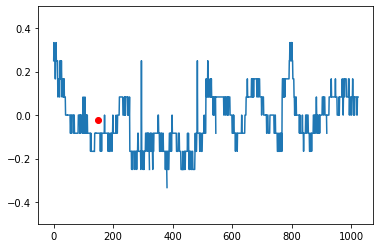

In [12]:
plt.plot(range(1024),Y_pol)
plt.ylim(-0.5, 0.5)
average_beam_pol=np.nanmean(Y_pol)
plt.scatter(150,average_beam_pol,c="red")
print(average_beam_pol)

(256,)
(256,)
(256,)
(256,)
0.02371541463692669
-0.1548089618857199
0.11561265013552466
0.12764550455742413


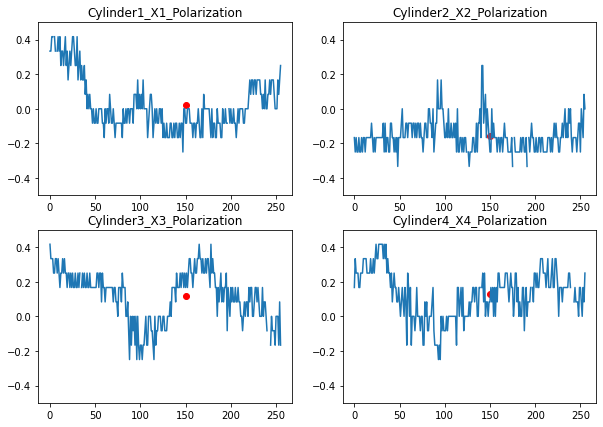

In [13]:
X1= ddd[256:512]
X2= ddd[768:1024]
X3= ddd[1280:1536]
X4= ddd[1792:2048]
print(np.shape(X1))
print(np.shape(X2))
print(np.shape(X3))
print(np.shape(X4))

fig = plt.figure(figsize=(10, 7))

fig.add_subplot(2,2,1)
plt.title("Cylinder1_X1_Polarization")
plt.ylim(-0.5, 0.5)
plt.plot(range(256),X1)
average_beam11=np.nanmean(X1)
plt.scatter(150,average_beam11,c="red")
print(average_beam11)
#plt.show()


fig.add_subplot(2,2,2)
plt.title("Cylinder2_X2_Polarization")
plt.ylim(-0.5, 0.5)
plt.plot(range(256),X2)
average_beam22=np.nanmean(X2)
plt.scatter(150,average_beam22,c="red")
print(average_beam22)
#plt.show()

fig.add_subplot(2,2,3)
plt.title("Cylinder3_X3_Polarization")
plt.ylim(-0.5, 0.5)
plt.plot(range(256),X3)
average_beam33=np.nanmean(X3)
plt.scatter(150,average_beam33,c="red")
print(average_beam33)
#plt.show()

fig.add_subplot(2,2,4)
plt.title("Cylinder4_X4_Polarization")
plt.ylim(-0.5, 0.5)
plt.plot(range(256),X4)
average_beam44=np.nanmean(X4)
plt.scatter(150,average_beam44,c="red")
print(average_beam44)
#plt.show()

In [14]:
# mean and standard deviation
x1_mean=np.nanmean(X1)
x1_std=np.nanstd(X1)
print(x1_mean,x1_std)

x2_mean=np.nanmean(X2)
x2_std=np.nanstd(X2)
print(x2_mean,x2_std)

x3_mean=np.nanmean(X3)
x3_std=np.nanstd(X3)
print(x3_mean,x3_std)

x4_mean=np.nanmean(X4)
x4_std=np.nanstd(X4)
print(x4_mean,x4_std)

0.02371541463692669 0.15052881294596643
-0.1548089618857199 0.09117840276408433
0.11561265013552466 0.14688609739659594
0.12764550455742413 0.13836668153451875


In [15]:
X_pol = np.concatenate((X1, X2,X3,X4))
print(np.shape(X_pol))

(1024,)


0.027942631235226445


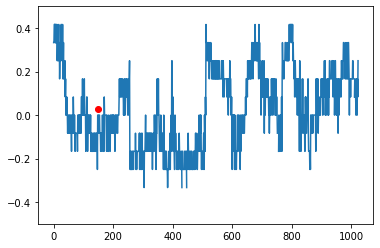

In [16]:
plt.plot(range(1024),X_pol)
plt.ylim(-0.5, 0.5)
average_beam_pol1=np.nanmean(X_pol)
plt.scatter(150,average_beam_pol1,c="red")
print(average_beam_pol1)

0.003460207454090477


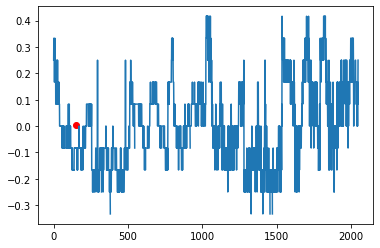

In [17]:
gg= np.concatenate((Y_pol, X_pol))
np.shape(gg)
plt.plot(range(2048),gg)
average_beam_gg=np.nanmean(gg)
plt.scatter(150,average_beam_gg,c="red")
print(average_beam_gg)
#plt.xlim(-0.5, 0.5)